In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
# load dataset
demo = pd.read_csv("KData.csv")
feature_cols = ['K']
X = demo[feature_cols] 
y = demo.K_Level

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
tree = DecisionTreeClassifier(criterion="entropy")
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9967897271268058


In [5]:
new_input = [[195.44]]
new_output = tree.predict(new_input)
print(new_input, new_output)

[[195.44]] ['M']


In [6]:
print(demo.groupby('K_Level').size())

K_Level
FALSE      2
H        203
L         44
M        101
MH       132
VH       873
VL       201
dtype: int64


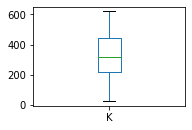

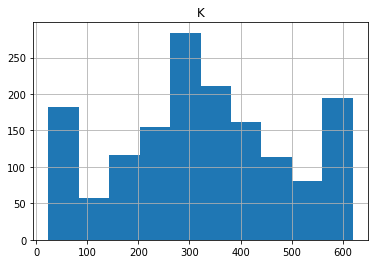

In [7]:
# box and whisker plots
demo.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()
# histograms
demo.hist()
plt.show()


[Text(523.125, 498.3, 'X[0] <= 299.185\nentropy = 1.967\nsamples = 933\nvalue = [2, 127, 24, 65, 80, 517, 118]'),
 Text(418.5, 407.70000000000005, 'X[0] <= 200.99\nentropy = 2.189\nsamples = 416\nvalue = [2, 127, 24, 65, 80, 0, 118]'),
 Text(209.25, 317.1, 'X[0] <= 99.355\nentropy = 1.412\nsamples = 209\nvalue = [2, 0, 24, 65, 0, 0, 118]'),
 Text(104.625, 226.5, 'entropy = 0.0\nsamples = 118\nvalue = [0, 0, 0, 0, 0, 0, 118]'),
 Text(313.875, 226.5, 'X[0] <= 149.8\nentropy = 0.975\nsamples = 91\nvalue = [2, 0, 24, 65, 0, 0, 0]'),
 Text(209.25, 135.89999999999998, 'X[0] <= 101.72\nentropy = 0.391\nsamples = 26\nvalue = [2, 0, 24, 0, 0, 0, 0]'),
 Text(104.625, 45.299999999999955, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0, 0, 0]'),
 Text(313.875, 45.299999999999955, 'entropy = 0.0\nsamples = 24\nvalue = [0, 0, 24, 0, 0, 0, 0]'),
 Text(418.5, 135.89999999999998, 'entropy = 0.0\nsamples = 65\nvalue = [0, 0, 0, 65, 0, 0, 0]'),
 Text(627.75, 317.1, 'X[0] <= 250.74\nentropy = 0.962\ns

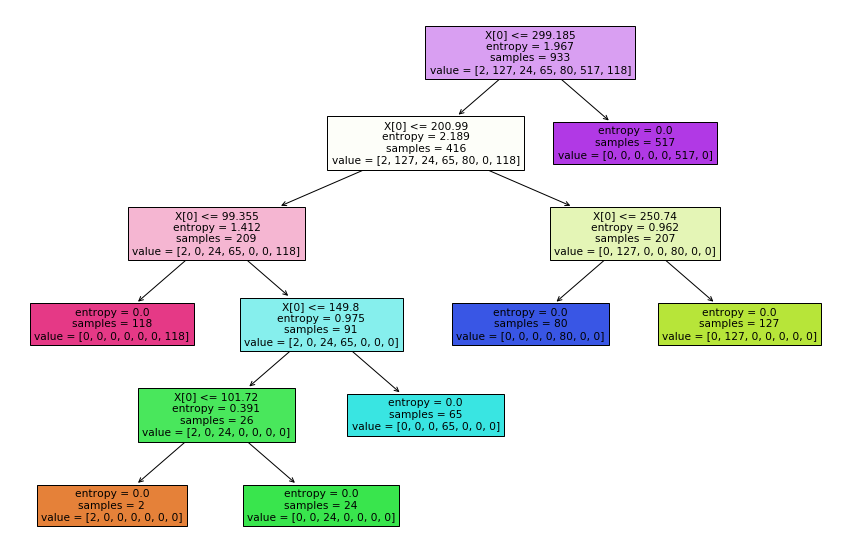

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
data = pd.read_csv("KData.csv")
feature_cols = ['K']
X = data[feature_cols] 
y = data.K_Level
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
tr = DecisionTreeClassifier(criterion="entropy")
tr = tr.fit(X_train,y_train)
plt.figure(figsize=(15,10))
tree.plot_tree(tr,filled=True)

In [11]:
print(tree.export_text(tr))

|--- feature_0 <= 299.18
|   |--- feature_0 <= 200.99
|   |   |--- feature_0 <= 99.35
|   |   |   |--- class: VL
|   |   |--- feature_0 >  99.35
|   |   |   |--- feature_0 <= 149.80
|   |   |   |   |--- feature_0 <= 101.72
|   |   |   |   |   |--- class: FALSE
|   |   |   |   |--- feature_0 >  101.72
|   |   |   |   |   |--- class: L
|   |   |   |--- feature_0 >  149.80
|   |   |   |   |--- class: M
|   |--- feature_0 >  200.99
|   |   |--- feature_0 <= 250.74
|   |   |   |--- class: MH
|   |   |--- feature_0 >  250.74
|   |   |   |--- class: H
|--- feature_0 >  299.18
|   |--- class: VH



In [12]:
import pickle
pickle.dump(tr, open('Kpredict.pkl', 'wb'))